In [27]:
# 7.2.4 ARIMA 모델 (250220)

from pandas import read_csv
# from pandas import datetime
from datetime import datetime
from pandas import DataFrame
#from statsmodels.tsa.arima_model import ARIMA
##statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):   # 시간을 표현하는 함수 정의
    return datetime.strptime('199'+x, '%Y-%m')    # strptime() : 날짜와 시간 정보를 문자열로 바꿔주는 메서드

'''
# 데이터 형태 참조

Month,Sales
1-01,266
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
'''

#series = read_csv('./data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)  # 자전거 매출에 대한 데이터 호출
series = read_csv('./data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)  # 자전거 매출에 대한 데이터 호출

C:\Users\wonta\AppData\Local\Temp\ipykernel_20792\1995971649.py:27: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('./data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)  # 자전거 매출에 대한 데이터 호출


c:\Users\wonta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\wonta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\wonta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                    목, 20 2 2025   AIC                            411.302
Time:                        15:34:32   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

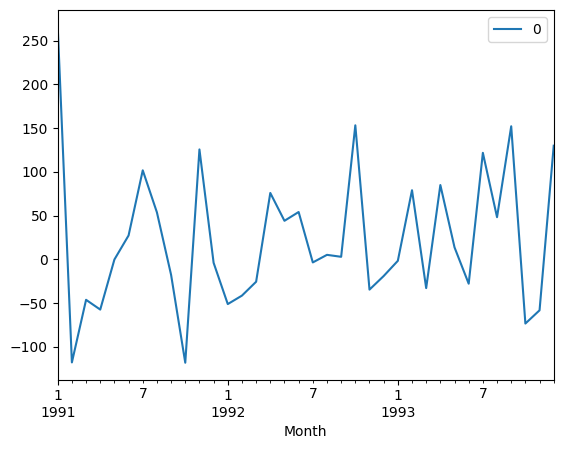

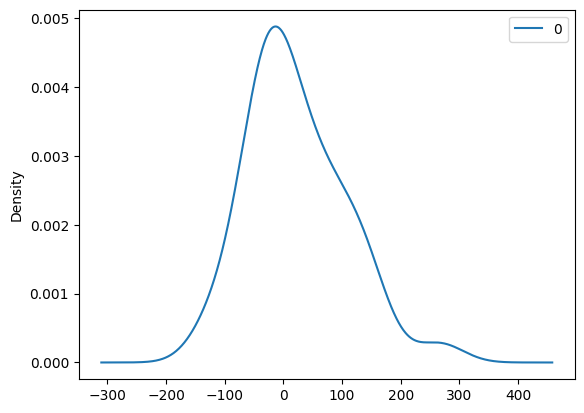

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [28]:
model = ARIMA(series, order=(5, 1, 0))  # ARIMA 함수 호출
model_fit = model.fit()    
print(model_fit.summary())       # 모델에 대한 정보 표시

residuals = DataFrame(model_fit.resid)   # 오차 정보를 데이터프레임에 저

residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

In [29]:
# 코드 설명
# ARIMA : 자기 회귀 누적 이동 평균 - 자기 회귀와 이동 평균을 둘 다 고려하는 모형
#       : ARMA와 달리 과거 데이터의 선형관계 뿐만 아니라 추세(cointegration)까지 고려한 모델임
# 자기 회귀 차수를 5로 설정하고, 차분 차수는 1을 사용, 시계열을 정지 상태로 만들기 위해 이동 평균 차수는 0을 사용

In [30]:
# 프로젝트 : KOSPI 지수를 기준으로 특정 종목을 ARIMA 분석 비교 -> 변동성을 판단하는 알고리즘
# 멱함수 형태 비교를 통하여 Fat-tail의 형태를 확인하고 이를 통하여 Day Trading을 통한 최대 기대 수익을 얻을 수 있는 종목 판단

In [31]:
print(series[1:10])

            Sales
Month            
1991-02-01  145.9
1991-03-01  183.1
1991-04-01  119.3
1991-05-01  180.3
1991-06-01  168.5
1991-07-01  231.8
1991-08-01  224.5
1991-09-01  192.8
1991-10-01  122.9


In [32]:
print(series.values)

[[266. ]
 [145.9]
 [183.1]
 [119.3]
 [180.3]
 [168.5]
 [231.8]
 [224.5]
 [192.8]
 [122.9]
 [336.5]
 [185.9]
 [194.3]
 [149.5]
 [210.1]
 [273.3]
 [191.4]
 [287. ]
 [226. ]
 [303.6]
 [249.9]
 [431.6]
 [266.5]
 [346.3]
 [329.7]
 [445.4]
 [325.9]
 [449.3]
 [411.3]
 [417.4]
 [545.5]
 [477.6]
 [687. ]
 [435.3]
 [587.3]
 [676.9]]


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                    목, 20 2 2025   AIC                            411.302
Time:                        15:34:33   BIC                            420.634
Sample:                             0   HQIC                           414.523
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

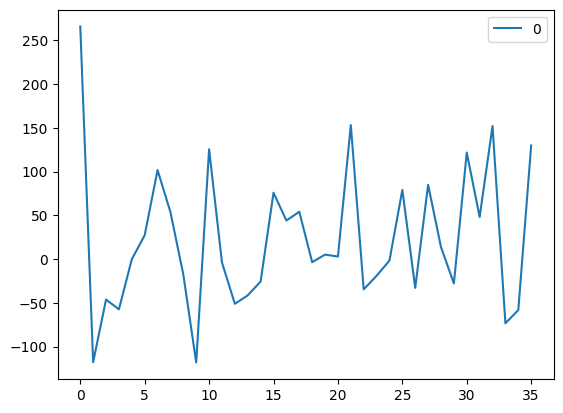

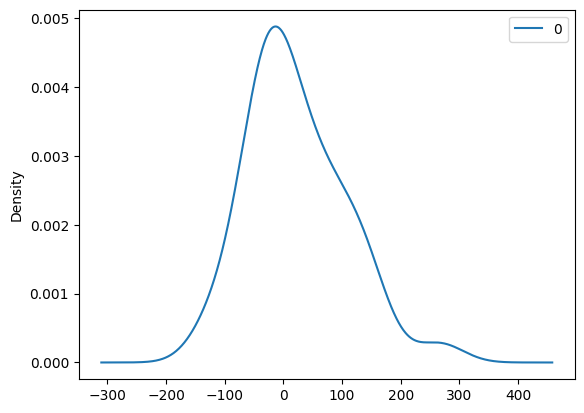

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [33]:
model = ARIMA(series.values, order=(5, 1, 0))  # value 값만 가져와서 입력 -> series로 입력해도 결국 value만 입력으로 사용함 (250220)
model_fit = model.fit()    
print(model_fit.summary())       # 모델에 대한 정보 표시

residuals = DataFrame(model_fit.resid)   # 오차 정보를 데이터프레임에 저장장

residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

In [34]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
print(len(df_krx))
df_krx.head()

2874


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,58400,2,-300,-0.51,59100,59100,58100,21437400,1256063031500,347441344410000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,212000,2,-6500,-2.97,217000,218500,211000,3059548,657023688000,154336501380000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,376500,1,10500,2.87,367500,378500,365000,315914,118342999000,87984000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1149000,2,-7000,-0.61,1150000,1156000,1126000,78287,89301040000,81565404000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,203000,2,-1000,-0.49,202500,204000,201500,327958,66329103000,42302070582000,209416191,STK


In [51]:
df_KOSPI = fdr.DataReader('KS11', '2024')   # KOSPI
#df_Target = fdr.DataReader('005930', '2024')  # Target 종목 : 삼성전자
df_Target = fdr.DataReader('475150', '2024')  # Target 종목 : SK이터닉스


df_KOSPI.head(10)


1 001 2024-01-01 00:00:00 2025-12-31 00:00:00


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2024-01-02,2645.47,2675.80,2641.88,2669.81,409871688,0.0055,1,14.53,9628190129018,2147223894556881
2024-01-03,2643.54,2643.72,2607.31,2607.31,463131608,-0.0234,2,-62.50,10121578328315,2096573473823721
2024-01-04,2592.44,2602.64,2580.09,2587.02,770176172,-0.0078,2,-20.29,8992273956601,2081862659594752
2024-01-05,2586.89,2592.29,2572.60,2578.08,522289892,-0.0035,2,-8.94,8384472928787,2075148802709824
2024-01-08,2584.23,2591.68,2566.34,2567.82,320143990,-0.0040,2,-10.26,6763632029996,2067290656237408
2024-01-09,2598.31,2599.37,2556.00,2561.24,791214273,-0.0026,2,-6.58,8896714487368,2061575745648289
2024-01-10,2563.97,2568.19,2539.82,2541.98,570021066,-0.0075,2,-19.26,8795834820834,2045533566125824
2024-01-11,2543.03,2557.30,2540.27,2540.27,788422596,-0.0007,2,-1.71,13669889824902,2043896294511727
2024-01-12,2536.55,2543.83,2517.76,2525.05,790177187,-0.0060,2,-15.22,8368765827550,2047248114238733


<Axes: xlabel='Date'>

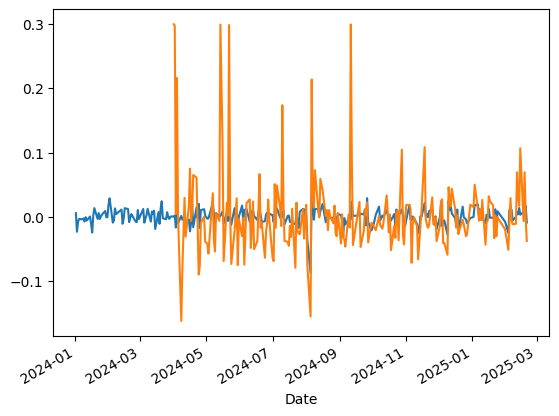

In [52]:
df_KOSPI['Change'].plot()
df_Target['Change'].plot()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  276
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 801.512
Date:                    목, 20 2 2025   AIC                          -1591.023
Time:                        15:47:10   BIC                          -1569.322
Sample:                             0   HQIC                         -1582.314
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8206      0.034    -24.355      0.000      -0.887      -0.755
ar.L2         -0.7493      0.045    -16.684      0.000      -0.837      -0.661
ar.L3         -0.5565      0.060     -9.346      0.0

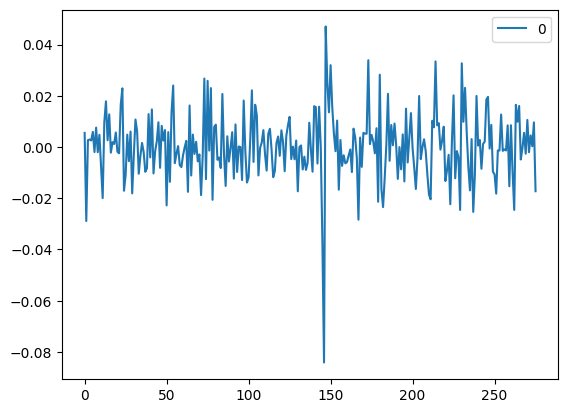

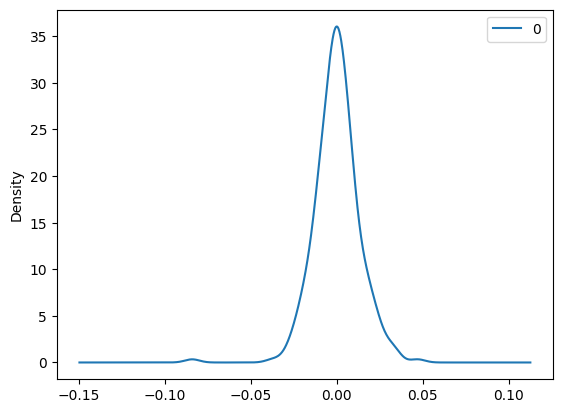

                0
count  276.000000
mean     0.000097
std      0.013148
min     -0.084118
25%     -0.007690
50%     -0.000081
75%      0.007113
max      0.047046


In [53]:
series = df_KOSPI['Change']

model = ARIMA(series.values, order=(5, 1, 0))  # value 값만 가져와서 입력 -> series로 입력해도 결국 value만 입력으로 사용함 (250220)
model_fit = model.fit()    
print(model_fit.summary())       # 모델에 대한 정보 표시

residuals = DataFrame(model_fit.resid)   # 오차 정보를 데이터프레임에 저장장

residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

In [54]:
series_KOSPI = df_KOSPI['Change']
series_Target = df_Target['Change']

model_KOSPI = ARIMA(series_KOSPI.values, order=(5, 1, 0))  # value 값만 가져와서 입력 -> series로 입력해도 결국 value만 입력으로 사용함 (250220)
model_KOSPI_fit = model_KOSPI.fit()    

model_Target = ARIMA(series_Target.values, order=(5, 1, 0))  # value 값만 가져와서 입력 -> series로 입력해도 결국 value만 입력으로 사용함 (250220)
model_Target_fit = model_Target.fit()    


residuals_KOSPI = DataFrame(model_KOSPI_fit.resid)   # 오차 정보를 데이터프레임에 저장
residuals_Target = DataFrame(model_Target_fit.resid)   # 오차 정보를 데이터프레임에 저장

print("==KOSPI==")
print(residuals_KOSPI.describe())

print("==Target==")
print(residuals_Target.describe())

==KOSPI==
                0
count  276.000000
mean     0.000097
std      0.013148
min     -0.084118
25%     -0.007690
50%     -0.000081
75%      0.007113
max      0.047046
==Target==
                0
count  215.000000
mean    -0.002250
std      0.070282
min     -0.293628
25%     -0.031506
50%     -0.002567
75%      0.019951
max      0.325107


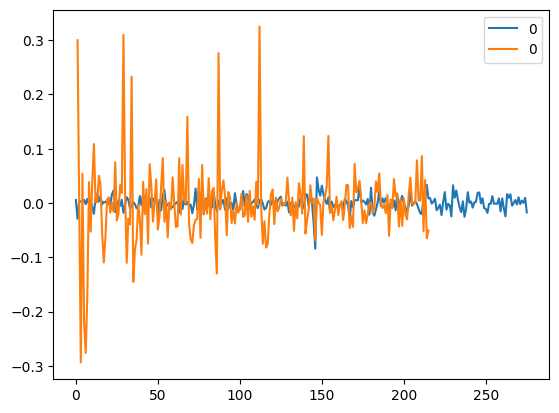

In [ ]:
import matplotlib.pyplot as pyplot

ax = pyplot.gca() 
residuals_KOSPI.plot(label='KOSPI', ax=ax) 
residuals_Target.plot(label='Target', ax=ax)
pyplot.legend()                                          
pyplot.show()  

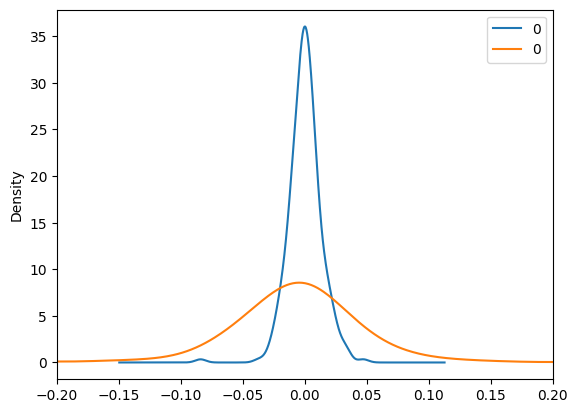

In [58]:
import matplotlib.pyplot as pyplot

ax = pyplot.gca() 
residuals_KOSPI.plot(kind='kde', label='KOSPI', ax=ax)  
residuals_Target.plot(kind='kde', label='Target', ax=ax) 
pyplot.xlim(-0.2, 0.2)   
pyplot.legend()                                          
pyplot.show()  


In [ ]:
# Target 종목의 경우, 변동폭이 매우 큰 "위험" 종목에 해당하는 것으로 판단할 수 있다. (250220)

# 다음 프로젝트 :
# 배당을 목표로 금융주에 투자한다고 할 때, 변동성이 작고 + 배당률이 높은 안정적인 종목을 선택하고자 할 때,
# 가장 적절한 종목을 2024년 데이터를 근거로 판단한다면? 

# 물음 - ARIMA 분석에서 평균(mean)과 잔차(residuals)의 의미?